## Importing the libraries

In [47]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

## Reading the CSV data

In [48]:
#reading the data
df = pd.read_csv('/Users/santoshku/Documents/upGrad_PG/case study/loan.csv')

In [49]:
#checking first five rows of the data
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [50]:
#checking column names of the data
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# Date cleaning

## Removing the null values

Since columns with more number of null values doesnt give insights on the problem.
columns consisting 85% of null values are removed.


Creating a variable to provide the percentage null values

In [51]:
per_null = int(max(df.isna().sum()) * .85)
per_null


33759


Removing the columns with more than 85% of null values.

In [52]:
df_no_null = pd.DataFrame()
for x in df.columns:
    if (df[x].isna().sum() < per_null):
        df_no_null[x] = df[[x]]

Removing the string 'month' from term and converting it to integer type

In [54]:

df_no_null['term'] = df_no_null['term'].apply(lambda x : x.replace(' months', ''))
df_no_null['term'] = df_no_null['term'].apply(lambda x : int(x))


The case study is to identify the reasons for defaults, We cannot get insights with the current ongoing loan data, hence the columns which are relevent to current ongoing loan are removed
A new filtered dataset is created.

In [55]:
df_filtered = df_no_null[['member_id','term','annual_inc','int_rate','purpose','loan_amnt','loan_status','id','grade','home_ownership','emp_length','dti','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']]
df_filtered

,member_id,term,annual_inc,int_rate,purpose,loan_amnt,loan_status,id,grade,home_ownership,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,1296599,36,24000.0,10.65%,credit_card,5000,Fully Paid,1077501,B,RENT,...,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16
1,1314167,60,30000.0,15.27%,car,2500,Charged Off,1077430,C,RENT,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13
2,1313524,36,12252.0,15.96%,small_business,2400,Fully Paid,1077175,C,RENT,...,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16
3,1277178,36,49200.0,13.49%,other,10000,Fully Paid,1076863,C,RENT,...,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16
4,1311748,60,80000.0,12.69%,other,3000,Current,1075358,B,RENT,...,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92174,36,110000.0,8.07%,home_improvement,2500,Fully Paid,92187,A,MORTGAGE,...,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10
39713,90607,36,18000.0,10.28%,credit_card,8500,Fully Paid,90665,C,RENT,...,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10
39714,90390,36,100000.0,8.07%,debt_consolidation,5000,Fully Paid,90395,A,MORTGAGE,...,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07
39715,89243,36,200000.0,7.43%,other,5000,Fully Paid,90376,A,MORTGAGE,...,5174.198551,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07


Interest rate is converted into float by removing % and doing a type change

In [56]:
df_filtered['int_rate'] = df_filtered['int_rate'].apply(lambda x : x.replace('%', ''))
df_filtered['int_rate'] = df_filtered['int_rate'].apply(lambda x : float(x))

Removing the account details which are currently active.

In [57]:
df_filtered = df_filtered[df_filtered['loan_status'] != 'Current']

## Univariate analysis

<AxesSubplot:ylabel='loan_status'>

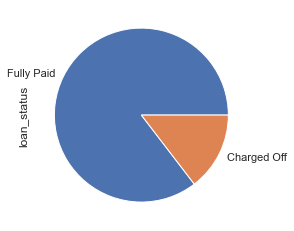

In [58]:
(df_filtered['loan_status'].value_counts(1)*100).plot(kind='pie')

Insight - picture shows roughly 85% have completely paid the loan, rest 15% are charged off

<AxesSubplot:>

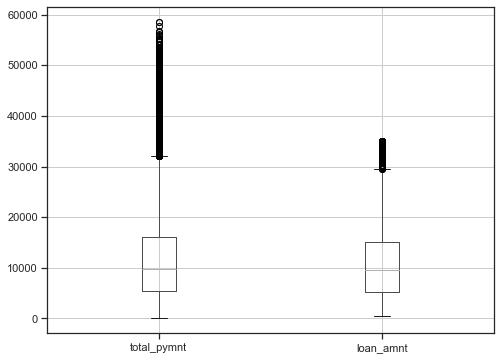

In [78]:
y = df_filtered[['total_pymnt','loan_amnt']]
y.boxplot(figsize=(8,6))

Insight - There are high number of outliers in the data w.r.t total_pymnt,total_pymnt_inv, total_rec_int,last_pymnt_amnt

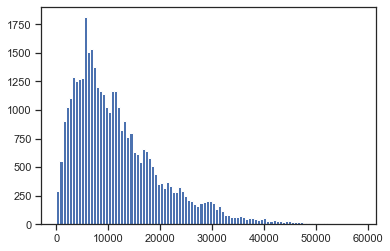

In [60]:
plt.hist(df_filtered['total_pymnt'], bins = 100)
plt.show()

Insight - Majority of total payment made upto 15000 have been received.

## Bivariate Analysis

In [79]:
x = df_filtered[['loan_status','grade','id']]
x.groupby(['loan_status','grade']).count()


id
loan_status grade       
Charged Off A        602
            B       1425
            C       1347
            D       1118
            E        715
            F        319
            G        101
Fully Paid  A       9443
            B      10250
            C       6487
            D       3967
            E       1948
            F        657
            G        198

from above data, 
we can rank G,F,E and D loan types as most likely defaultable loans respectively.

In [62]:
y = df_filtered[['loan_status','home_ownership','id']]
y.groupby(['loan_status','home_ownership']).count()

id
loan_status home_ownership       
Charged Off MORTGAGE         2327
            OTHER              18
            OWN               443
            RENT             2839
Fully Paid  MORTGAGE        14694
            NONE                3
            OTHER              80
            OWN              2532
            RENT            15641

From the data, Majority of the loans are taken by ppl whose houses are on mortgage or they stay in rented house.
percentage of defaulting between the category is similar hence conclusions cannot be arrived here.

In [63]:
z = df_filtered[['loan_status','emp_length','id']]
z.groupby(['loan_status','emp_length']).count()

id
loan_status emp_length      
Charged Off 1 year       456
            10+ years   1331
            2 years      567
            3 years      555
            4 years      462
            5 years      458
            6 years      307
            7 years      263
            8 years      203
            9 years      158
            < 1 year     639
Fully Paid  1 year      2713
            10+ years   7157
            2 years     3724
            3 years     3457
            4 years     2880
            5 years     2736
            6 years     1861
            7 years     1448
            8 years     1232
            9 years     1068
            < 1 year    3869

Generally people with greater than 10years of experience are most likely to be sanctioned with loans, There is no significant pattern with defaulting based on years of work experience. Peolpe with all sections of work experience have prominent numbers in charged off section.

# Data set is divided into chargedoff and Fullypaid 

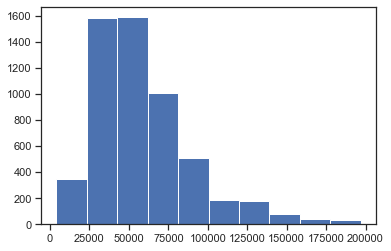

In [64]:
df_annual_income_chargedoff = df_filtered[df_filtered['loan_status'] == 'Charged Off']
df_annual_income_chargedoff = df_annual_income_chargedoff[df_annual_income_chargedoff['annual_inc'] < 200000]#removing outliers
plt.hist(df_annual_income_chargedoff['annual_inc'],bins = 10)
plt.show()

In [65]:
df_annual_income_chargedoff['annual_inc'].median()

52500.0

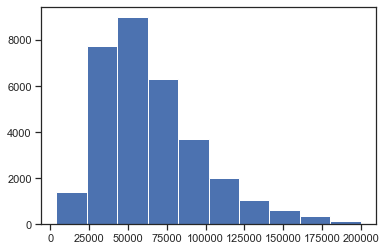

In [66]:
df_annual_income_fullypaid = df_filtered[df_filtered['loan_status'] == 'Fully Paid']
df_annual_income_fullypaid = df_annual_income_fullypaid[df_annual_income_fullypaid['annual_inc'] < 200000]#removing outliers
plt.hist(df_annual_income_fullypaid['annual_inc'],bins = 10)
plt.show()

In [67]:
df_annual_income_fullypaid['annual_inc'].median()

59000.0

majority of loans are sanctioned for ppl with annual income close to 75000, hence chanrged off cases also have a similar patter with the income, hence there is no correlation with annual income and defaulting

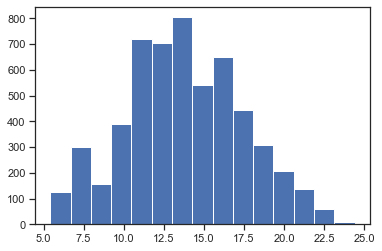

In [68]:
plt.hist(df_annual_income_chargedoff['int_rate'],bins = 15)
plt.show()

In [69]:
df_annual_income_chargedoff['int_rate'].median()

13.57

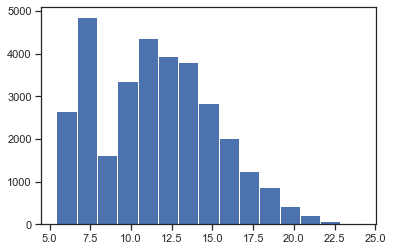

In [70]:
plt.hist(df_annual_income_fullypaid['int_rate'],bins = 15)
plt.show()

In [71]:
df_annual_income_fullypaid['int_rate'].median()

11.49

The defaulting on the loan has increasing trend when the interest rate is higher than 10%

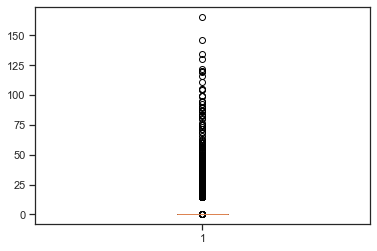

0.8642590371413146

In [72]:
plt.boxplot(df_annual_income_fullypaid['total_rec_late_fee'])
plt.show()
df_annual_income_fullypaid['total_rec_late_fee'].mean()

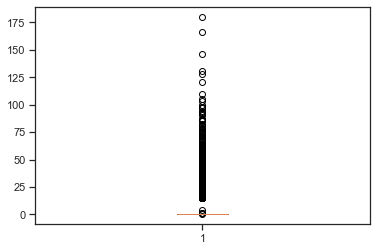

4.270301250041401

In [73]:
plt.boxplot(df_annual_income_chargedoff['total_rec_late_fee'])
plt.show()
df_annual_income_chargedoff['total_rec_late_fee'].mean()

Avergae late payment fee is high for charged off data, indicates that with the late payment , there is a strong possibility towards defaulting

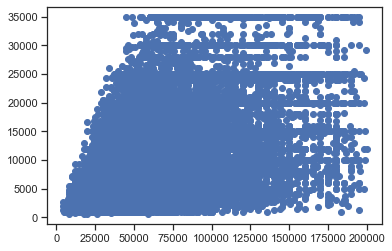

In [80]:
plt.scatter(df_annual_income_fullypaid['annual_inc'], df_annual_income_fullypaid['loan_amnt'])

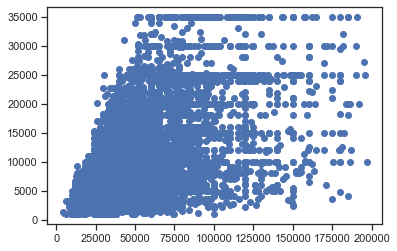

In [74]:
plt.scatter(df_annual_income_chargedoff['annual_inc'], df_annual_income_chargedoff['loan_amnt'])

Majority of the loan defaulting is seen when the annual income of the person is less that 75000.

In [75]:
a = df_filtered[['loan_status','term','id']]
a.groupby(['loan_status','term']).count()

id
loan_status term       
Charged Off 36     3227
            60     2400
Fully Paid  36    25869
            60     7081

The percentage of chargedoff cases are more when the loan is sanctioned for 60months

# Conclusion:

1. Roughly 85% have completely paid the loan, rest 15% are charged off <br />
2. There are high number of outliers in the data w.r.t total_pymnt,total_pymnt_inv, total_rec_int,last_pymnt_amnt<br />
3. Majority of total payment made upto 15000 have been received.<br />
4.we can rank G,F,E and D loan types as most likely defaultable loans respectively.<br />
5.From the data, Majority of the loans are taken by ppl whose houses are on mortgage or they stay in rented house.
percentage of defaulting between the category is similar hence conclusions cannot be arrived here.<br />
6. Generally people with greater than 10years of experience are most likely to be sanctioned with loans, There is no significant pattern with defaulting based on years of work experience. Peolpe with all sections of work experience have prominent numbers in charged off section.<br />
7.majority of loans are sanctioned for ppl with annual income close to 75000, hence chanrged off cases also have a similar patter with the income, hence there is no correlation with annual income and defaulting<br />
8.The defaulting on the loan has increasing trend when the interest rate is higher than 10%<br />
9.Avergae late payment fee is high for charged off data, indicates that with the late payment , there is a strong possibility towards defaulting<br />
10. Majority of the loan defaulting is seen when the annual income of the person is less that 75000.<br />
11. The percentage of chargedoff cases are more when the loan is sanctioned for 60months